<a href="https://colab.research.google.com/github/rpaulos/CCADMACL_EXERCISES_COM232/blob/main/Exercise4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [104]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [106]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [107]:
## put your answer here
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

2. Perform dimensionality reduction using PCA `(10 pts)`

In [108]:
## put your answer here
X_scaled.shape

(569, 30)

In [109]:
pca = PCA(n_components=7)
X_reduced = pca.fit_transform(X_scaled)

In [110]:
X_reduced.shape

(569, 7)

3. Get the total explained variance `(5 pts)`

In [111]:
## put your answer here
explained_variance = pca.explained_variance_ratio_

PC1_explained_variance = explained_variance[0]
print('Explained Variance of PC1', PC1_explained_variance)

PC2_explained_variance = explained_variance[1]
print('Explained Variance of PC2', PC2_explained_variance)

PC3_explained_variance = explained_variance[2]
print('Explained Variance of PC3', PC3_explained_variance)

PC4_explained_variance = explained_variance[3]
print('Explained Variance of PC4', PC4_explained_variance)

PC5_explained_variance = explained_variance[4]
print('Explained Variance of PC5', PC5_explained_variance)

PC6_explained_variance = explained_variance[5]
print('Explained Variance of PC6', PC6_explained_variance)

PC7_explained_variance = explained_variance[6]
print('Explained Variance of PC7', PC7_explained_variance)


Explained Variance of PC1 0.44272025607526366
Explained Variance of PC2 0.18971182044033078
Explained Variance of PC3 0.09393163257431389
Explained Variance of PC4 0.06602134915470147
Explained Variance of PC5 0.05495768492346265
Explained Variance of PC6 0.0402452203988335
Explained Variance of PC7 0.022507337129825077


In [112]:
print('Total explained variance:', explained_variance.sum())

Total explained variance: 0.9100953006967311


4. Plot the explained variances of each principal component `(5 pts)`

Text(0, 0.5, 'Explained Variance')

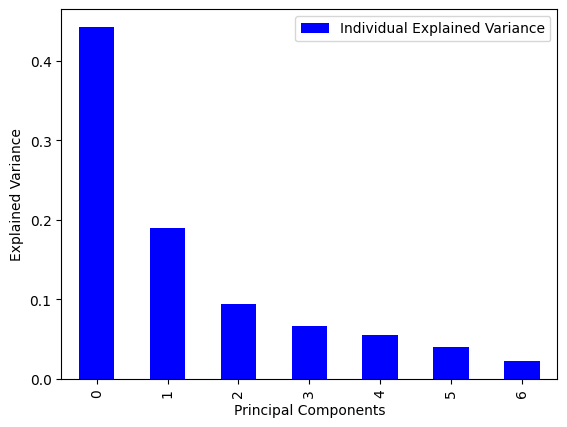

In [113]:
## put your answer here
pd.DataFrame(explained_variance).plot.bar(color='blue')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

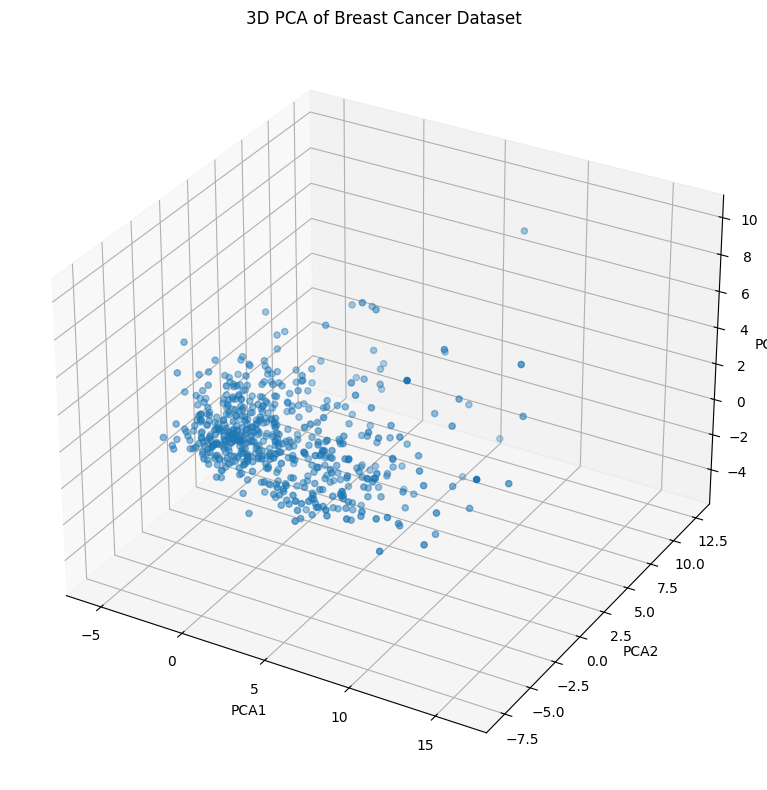

In [114]:
## put your answer here
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Breast Cancer Dataset')
plt.tight_layout()

In [123]:
import plotly.express as px

pca_df = pd.DataFrame(X_reduced, columns=[f'PCA{i+1}' for i in range(X_reduced.shape[1])])

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3')
fig.show()

6. Perform clustering using any clustering algorithm `(10 pts)`

In [115]:
## put your answer here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,
                n_init=10, random_state=0)

kmeans.fit(X_reduced)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


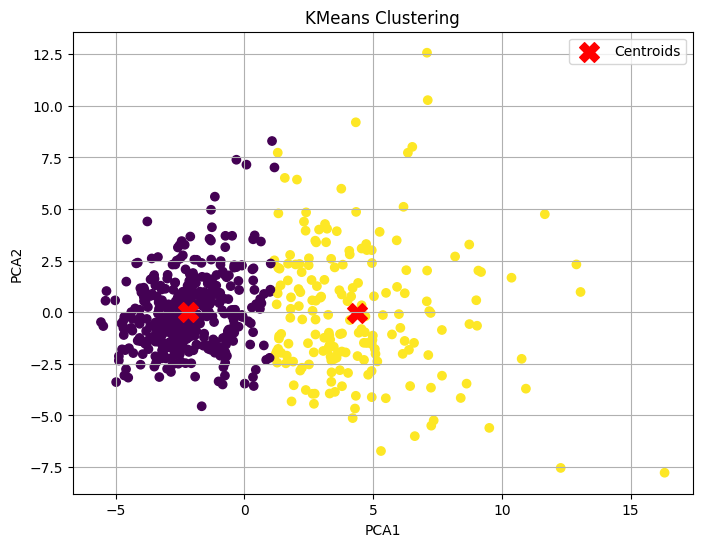

In [116]:
plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
pca_df['labels'] = labels

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='labels')
fig.show()

7. View the loading scores of each principal component `(5 pts)`

In [117]:
## put your answer here
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=X.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mean radius,0.798469,-0.558394,-0.014334,-0.058328,-0.048561,0.020610,-0.102055
mean texture,0.378346,-0.142564,0.108454,0.849451,0.063575,-0.035389,0.009375
mean perimeter,0.829965,-0.513800,-0.015649,-0.059137,-0.048032,0.019035,-0.094151
mean area,0.806101,-0.551755,0.048220,-0.075266,-0.013277,-0.002076,-0.042482
mean smoothness,0.520110,0.444392,-0.175226,-0.224505,0.469197,-0.314945,-0.115692
mean compactness,0.872817,0.362680,-0.124485,-0.044786,-0.015041,-0.015541,0.025429
mean concavity,0.942542,0.143660,0.004593,-0.026936,-0.111006,-0.010276,-0.088429
mean concave points,0.951490,-0.083016,-0.042951,-0.092032,0.056368,-0.057243,-0.123763
mean symmetry,0.503978,0.454506,-0.067609,-0.094552,0.393183,0.392020,-0.077220
mean fractal dimension,0.234772,0.875292,-0.037928,-0.068439,0.057092,-0.131346,0.243245


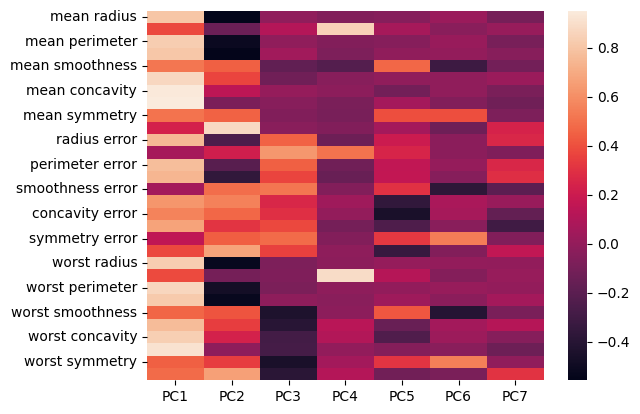

In [118]:
sns.heatmap(loading_matrix)
plt.show()